## Clustering with KMeans

In [48]:
# import libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# load the dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [50]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [51]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [52]:
df=df.drop(['sepal length (cm)','sepal width (cm)'],axis = 1)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Text(0, 0.5, 'petal width (cm)')

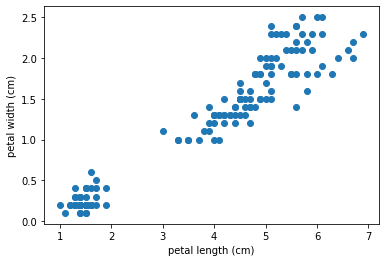

In [53]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [54]:
km =KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [55]:
df['cluster'] = y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [56]:
kmc = km.cluster_centers_
kmc

array([[1.462     , 0.246     ],
       [4.26923077, 1.34230769],
       [5.59583333, 2.0375    ]])

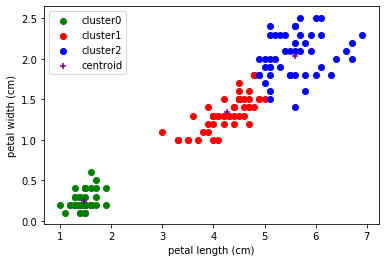

In [57]:
df1= df[df.cluster==0]
df2= df[df.cluster==1]
df3= df[df.cluster==2]

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color ='green', label = 'cluster0')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color ='red', label = 'cluster1')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'], color ='blue', label = 'cluster2')
plt.scatter(kmc[:,0],kmc[:,1],color ='purple', marker='+', label = 'centroid')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

### Preprocessing Using MinMaxScalar

In [58]:
scalar = MinMaxScaler()

In [59]:
scalar.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scalar.transform(df[['petal length (cm)']])

scalar.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scalar.transform(df[['petal width (cm)']])
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


In [60]:
y_predict2 = km.fit_predict(df)
y_predict2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [63]:
df['cluster2'] = y_predict2
df.head()

,petal length (cm),petal width (cm),cluster,cluster2
0,0.067797,0.041667,0,0
1,0.067797,0.041667,0,0
2,0.050847,0.041667,0,0
3,0.084746,0.041667,0,0
4,0.067797,0.041667,0,0


In [64]:
kmc = km.cluster_centers_
kmc

array([[7.83050847e-02, 6.08333333e-02, 4.44089210e-16],
       [7.78954802e-01, 8.07291667e-01, 2.00000000e+00],
       [5.54106910e-01, 5.17628205e-01, 1.00000000e+00]])

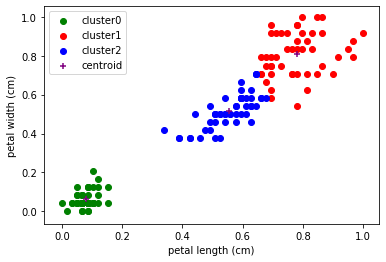

In [65]:
df1= df[df.cluster2==0]
df2= df[df.cluster2==1]
df3= df[df.cluster2==2]

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color ='green', label = 'cluster0')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color ='red', label = 'cluster1')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'], color ='blue', label = 'cluster2')
plt.scatter(kmc[:,0],kmc[:,1],color ='purple', marker='+', label = 'centroid')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

### Elbow Plot

In [70]:
sse=[]
k_rng=range(1,10)
for K in k_rng:
    km = KMeans(n_clusters=K)
    km.fit(df)
    sse.append(km.inertia_)

Text(0, 0.5, 'Sum of squared error')

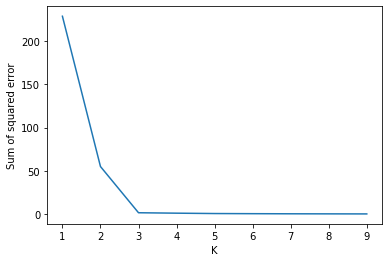

In [72]:
plt.plot(k_rng,sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')